In [1]:
from queue import PriorityQueue
import time

#### **A * search using Manhattan distance**

In [2]:
# Declaring the heuristic function as manhattan distance
def heuristic(cell1,cell2):
    x1,y1=cell1
    x2,y2=cell2
    return abs(x1-x2) + abs(y1-y2)

In [3]:
def aStar(m):
    st = time.time()
    start=(m.rows,m.cols)
    goal=(1,1)
    g_score={cell:float('inf') for cell in m.grid}
    g_score[start]=0
    f_score={cell:float('inf') for cell in m.grid}
    f_score[start]=heuristic(start,goal)

    open=PriorityQueue()
    open.put((heuristic(start,goal),heuristic(start,goal),start))
    aPath={}
    searchPath = []
    
    while not open.empty():
        currCell=open.get()[2]
        searchPath.append(currCell)

        if currCell == goal:
            break

        for d in 'ESNW':
            if m.maze_map[currCell][d] == True:
                if d == 'E':
                    childCell = (currCell[0], currCell[1]+1)
                if d == "W":
                    childCell = (currCell[0], currCell[1]-1)
                if d == "S":
                    childCell = (currCell[0]+1, currCell[1])   
                if d == "N":
                    childCell = (currCell[0]-1, currCell[1])  
   
                temp_g_score = g_score[currCell]+1
                temp_f_score = temp_g_score + heuristic(childCell,(1,1))

                if temp_f_score < f_score[childCell]:
                    g_score[childCell] = temp_g_score
                    f_score[childCell] = temp_f_score
                    open.put((temp_f_score, heuristic(childCell,(1,1)),childCell))
                    aPath[childCell]=currCell
    
    fwdPath={}
    
    while goal!=start:
        fwdPath[aPath[goal]]=goal
        goal=aPath[goal]

    et = time.time()
    elapsed_time = et - st

    return fwdPath, elapsed_time

#### **Breadth-First Search where a cell is allowed to be visited at most thrice**

In [4]:
def BFS(m):
    st = time.time()
    start = (m.rows, m.cols)
    explored = {start: 1}
    frontier = [start]

    bfsPath = {}
    searchPath = []

    while len(frontier) > 0:
        currCell = frontier.pop(0)
        searchPath.append(currCell)

        if currCell == (1, 1):
            break

        for d in 'ESNW':
            if m.maze_map[currCell][d] == True:
                if d == 'E':
                    childCell = (currCell[0], currCell[1] + 1)
                elif d == "W":
                    childCell = (currCell[0], currCell[1] - 1)
                elif d == "S":
                    childCell = (currCell[0] + 1, currCell[1])
                elif d == "N":
                    childCell = (currCell[0] - 1, currCell[1])

                if childCell in explored and explored[childCell] == 3:
                    continue

                # Update the visit count or add the cell to the explored dictionary
                if childCell in explored:
                    explored[childCell] += 1
                else:
                    explored[childCell] = 1

                frontier.append(childCell)
                bfsPath[childCell] = currCell

    fwdPath = {}
    cell = (1, 1)

    while cell != start:
        fwdPath[bfsPath[cell]] = cell
        cell = bfsPath[cell]

    et = time.time()
    elapsed_time = et - st

    return fwdPath, elapsed_time

In [5]:
from pyamaze import maze
# maze1 is a 10*10 maze with loopPercent 5
maze1 = maze()
maze1.CreateMaze(loadMaze="maze--10-10.csv")

# maze2 is a 15*15 maze with loopPercent 5
maze2 = maze()
maze2.CreateMaze(loadMaze="maze--15-15.csv")

# maze3 is a 20*20 maze with loopPercent 2
maze3 = maze()
maze3.CreateMaze(loadMaze="maze--20-20.csv")

# maze4 is a 25*25 maze with loopPercent 2
maze4 = maze()
maze4.CreateMaze(loadMaze="maze--25-25.csv")

# maze 1 is a 30*30 maze with loopPercent 5
maze5 = maze()
maze5.CreateMaze(loadMaze="maze--30-30.csv")

In [6]:
import matplotlib.pyplot as plt

a_star_time = []
BFS_time = []

a_star_time.append(aStar(maze1)[1]*1000)
a_star_time.append(aStar(maze2)[1]*1000)
a_star_time.append(aStar(maze3)[1]*1000)
a_star_time.append(aStar(maze4)[1]*1000)
a_star_time.append(aStar(maze5)[1]*1000)


In [7]:
a_star_time

[0.9377002716064453,
 0.9949207305908203,
 2.0363330841064453,
 2.9959678649902344,
 5.999326705932617]

In [8]:
BFS_time.append(BFS(maze1)[1]*1000)
BFS_time.append(BFS(maze2)[1]*1000)
BFS_time.append(BFS(maze3)[1]*1000)
BFS_time.append(BFS(maze4)[1]*1000)
BFS_time.append(BFS(maze5)[1]*1000)

In [9]:
BFS_time

[1.0044574737548828,
 0.9965896606445312,
 0.9949207305908203,
 2.979278564453125,
 5.00178337097168]

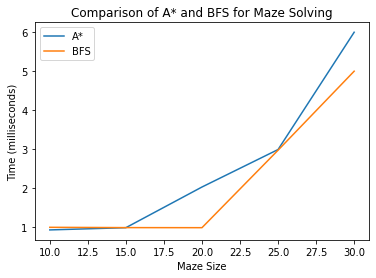

In [10]:
# plotting results
maze_sizes = [10, 15, 20, 25,30]
plt.plot(maze_sizes, a_star_time, label="A*")
plt.plot(maze_sizes, BFS_time, label="BFS")
plt.xlabel("Maze Size")
plt.ylabel("Time (milliseconds)")
plt.title("Comparison of A* and BFS for Maze Solving")
plt.legend()
plt.show()

`Based on the observation, Breadth-First Search (BFS) was consistently faster than the A* algorithm for maze pathfinding. This unexpected result indicates that the mazes used in this experiment likely had characteristics that made the optimal path easily discoverable without the need for heuristic guidance.`